1. Write a program to demonstrate the working of different activation functions like sigmoid, tanh, ReLU & softmax to train a neural network.

C:\Users\Ayush\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


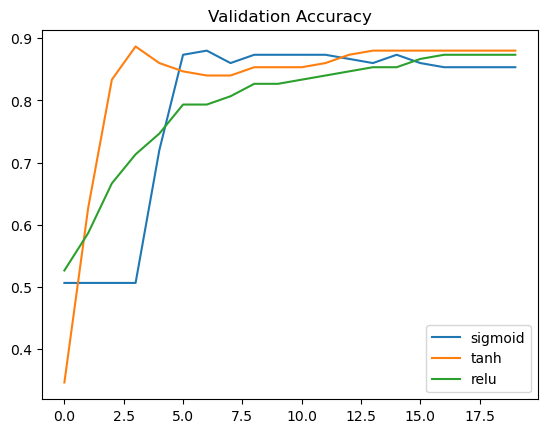

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Dataset
X, y = make_moons(n_samples=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare activation functions
activations = ['sigmoid', 'tanh', 'relu']
histories = {}

for act in activations:
    model = Sequential([
        Dense(16, activation=act, input_dim=2),
        Dense(8, activation=act),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    histories[act] = model.fit(X_train,
                                y_train, 
                                validation_data=(X_test, y_test), 
                                epochs=20, 
                                verbose=0).history

# Plot validation accuracy
for act in activations:
    plt.plot(histories[act]['val_accuracy'], label=act)
plt.legend()
plt.title('Validation Accuracy')
plt.show()